In [191]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [192]:
file_path = Path("../Project 4/loan_approval_dataset.csv")
df_loan = pd.read_csv(file_path)
df_loan.columns = df_loan.columns.str.strip()

# Display sample data
df_loan.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [193]:

df_loan = df_loan.drop(['education', 'self_employed'], axis=1)
#columns_to_drop = [2, 3]
#df_loan = df_loan.drop(df_loan.columns[columns_to_drop], axis=1)


#pd.Series(list(df_loan.columns))

In [194]:
X = df_loan.drop('loan_status', axis=1)
Y = df_loan['loan_status']

# X = df_loan.drop(df_loan.columns[[10]], axis=1)
# Y = df_loan[df_loan.columns[[10]]]


In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [196]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [197]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [198]:
Y_pred = rf_classifier.predict(X_test)

In [199]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9754098360655737


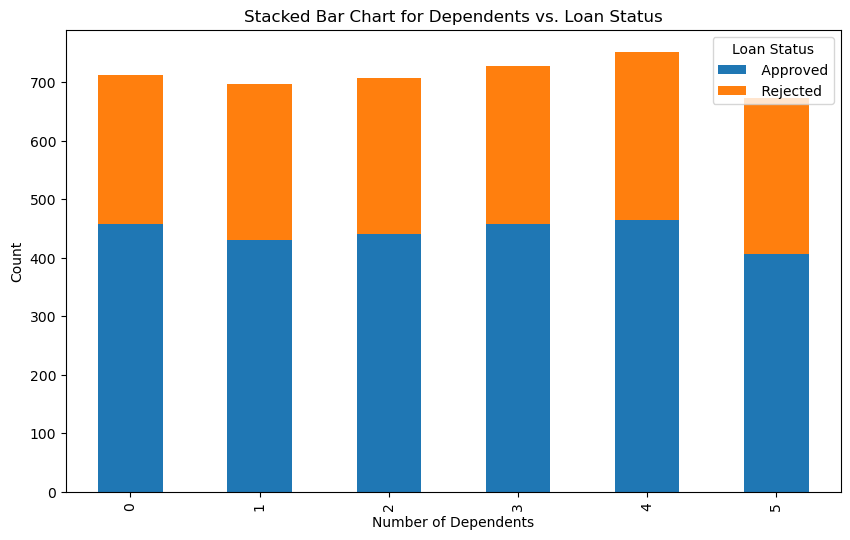

In [200]:

pivot_df = df_loan.pivot_table(index='no_of_dependents', columns='loan_status', aggfunc='size', fill_value=0)

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart for Dependents vs. Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

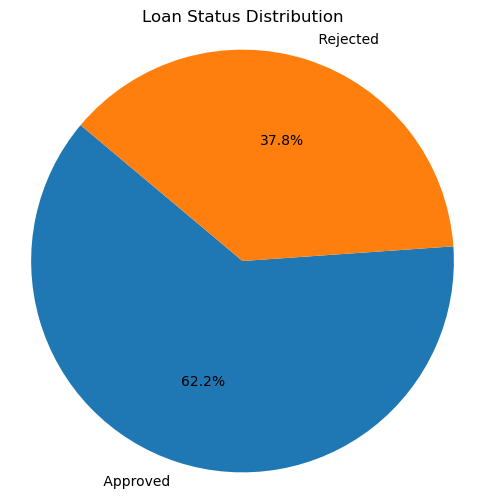

In [201]:
# loan_status_counts = df_loan['loan_status'].value_counts()

# # Create a pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Loan Status Distribution')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()